In [ ]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Read in csv file
cleanData = pd.read_csv("clean_dataset.csv")

# Scale the "Debt" column back to its original values and cast to int
cleanData['CreditScore'] = cleanData['CreditScore'].apply(
    lambda x: round(x * (850 - 300) / (67 - 0) + 300)
).astype(int)

# Scale the "Debt" column back to its original values
cleanData['Debt'] = (cleanData['Debt'] * 1000).astype(int)

# Scale the "Income" column back to its original values
cleanData['Income'] = (cleanData['Income'] * 1000).astype(int)

# Cast the "Age" column to integers
cleanData['Age'] = cleanData['Age'].astype(int)

# Case the "YearsEmployed" column to integers
cleanData['YearsEmployed'] = cleanData['YearsEmployed'].astype(int)

# Print Raw Data
print(cleanData)

In [ ]:
# Find typical values for each variable
print(cleanData.describe())

In [ ]:
# Histogram for Credit Score
cleanData['CreditScore'].hist(bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=cleanData, x='Age', bins=30)
hist_plot.set_title('Age Distribution')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Frequency')

plt.show()

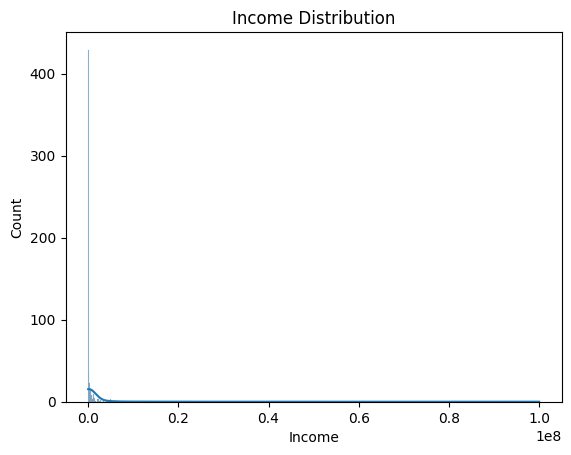

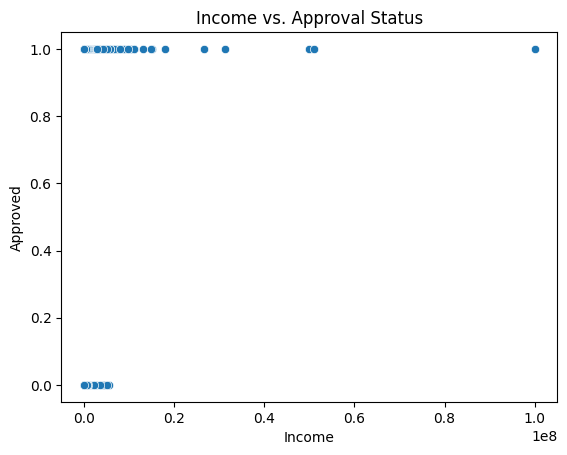

In [53]:
# Histogram for distribution
sns.histplot(cleanData['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

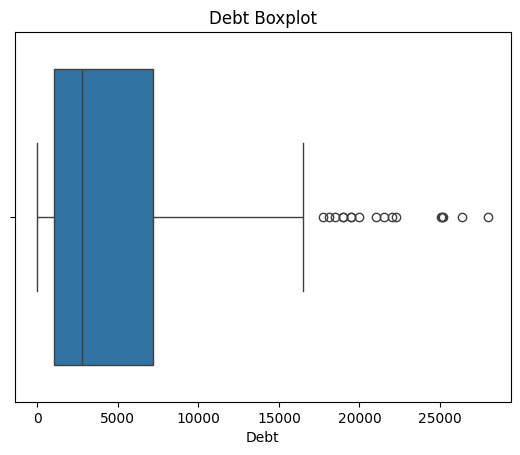

In [57]:
# Bloxplot for Debt
sns.boxplot(x=cleanData['Debt'])
plt.title('Debt Boxplot')
plt.show()

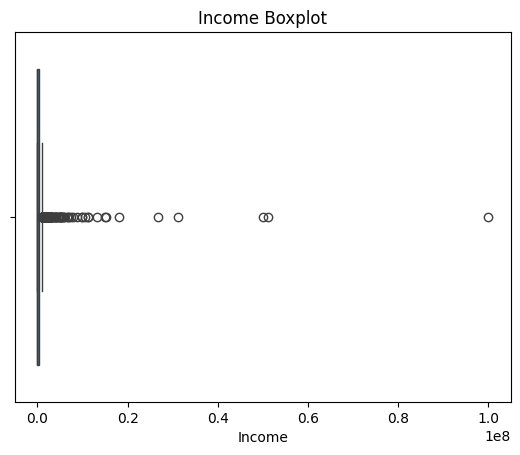

In [55]:
# Boxplot for Income
sns.boxplot(x=cleanData['Income'])
plt.title('Income Boxplot')
plt.show()

In [ ]:
# Bar chart for Industry
cleanData['Industry'].value_counts().plot(kind='bar')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

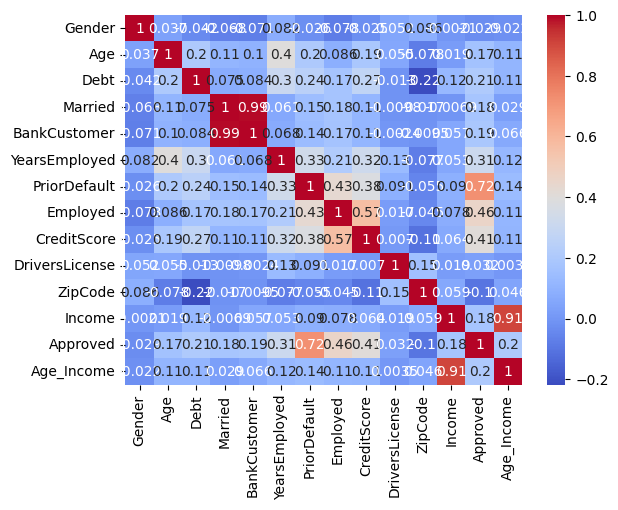

         Variables         VIF
0           Gender    3.363074
1              Age    9.545223
2             Debt    2.374351
3          Married  475.103635
4     BankCustomer  479.358462
5    YearsEmployed    1.866563
6     PriorDefault    4.804754
7         Employed    2.532225
8      CreditScore   16.647526
9   DriversLicense    1.945172
10         ZipCode    2.244970
11          Income    9.892723
12        Approved    4.234622
13      Age_Income   -0.941796


In [67]:
# Numeric columns from the DataFrame
numeric_df = cleanData.select_dtypes(include='number')

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

# VIF
VIF = pd.DataFrame()
VIF["Variables"] = numeric_df.columns
VIF["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(VIF)


In [ ]:
# Scatter plot for Debt and Income
plt.scatter(cleanData['Debt'], cleanData['Income'])
plt.title('Debt vs. Income')
plt.xlabel('Debt')
plt.ylabel('Income')
plt.show()

In [ ]:
# Income and Debt while controlling for CreditScore
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'CreditScore']])).fit()
)
plt.show()

In [ ]:
# A boxplot of YearsEmployed by Industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=cleanData, x='Industry', y='YearsEmployed')
boxplot.set_title('Years Employed Distribution by Industry')
boxplot.set_xlabel('Industry')
boxplot.set_ylabel('Years Employed')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Create a boxplot of Income by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='Income', data=cleanData)
boxplot.set_title('Income Distribution by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Income')
boxplot.set_xticklabels(['Female', 'Male'])

plt.show()

In [ ]:
# A boxplot of CreditScore by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='CreditScore', data=cleanData)
boxplot.set_title('Credit Scores by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Credit Score')
boxplot.set_xticklabels(['Female', 'Male'])

plt.show()

In [ ]:
# Income and Debt while controlling for Gender
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'Gender']])).fit()
)
plt.show()

In [ ]:
# Bar graph for average income by industry
industry_income = cleanData.groupby('Industry')['Income'].mean().reset_index()
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Income', y='Industry', data=industry_income)
barplot.set_title('Average Income by Industry')
barplot.set_xlabel('Average Income')
barplot.set_ylabel('Industry')

plt.show()

In [ ]:
# Boxplot of credit score by industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='CreditScore', y='Industry', data=cleanData)
boxplot.set_title('Credit Score Distribution by Industry')
boxplot.set_xlabel('Credit Score')
boxplot.set_ylabel('Industry')

plt.show()

In [ ]:
# Bar graph for average credit score by industry
industry_credit_score = cleanData.groupby('Industry')['CreditScore'].mean().reset_index()
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='CreditScore', y='Industry', data=industry_credit_score)
barplot.set_title('Average Credit Score by Industry')
barplot.set_xlabel('Average Credit Score')
barplot.set_ylabel('Industry')
plt.xlim(0, 400)

plt.show()

In [ ]:
# Stacked bar chart for approval/denial rates by industry
industry_approval_counts = cleanData.groupby(['Industry', 'Approved']).size().unstack(fill_value=0)
industry_approval_rates = industry_approval_counts.div(industry_approval_counts.sum(axis=1), axis=0)
industry_approval_rates = industry_approval_rates[[1, 0]]
industry_approval_rates.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#0000FF', '#FF0000'])
plt.title('Approval/Denial Rates by Industry')
plt.xlabel('Industry')
plt.ylabel('Rate')
plt.legend(['Approved', 'Denied'], title='Status')

plt.show()

In [ ]:
# Boxplot of Age by Industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=cleanData, x='Industry', y='Age')
boxplot.set_title('Age Distribution by Industry')
boxplot.set_xlabel('Industry')
boxplot.set_ylabel('Age')
plt.xticks(rotation=45, ha='right')

plt.show()

In [60]:
# Shapiro-Wilk Test for Income
stat, p = shapiro(cleanData['Income'])
print('Statistics = %.3f, p = %.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics = 0.170, p = 0.000
Sample does not look Gaussian (reject H0)


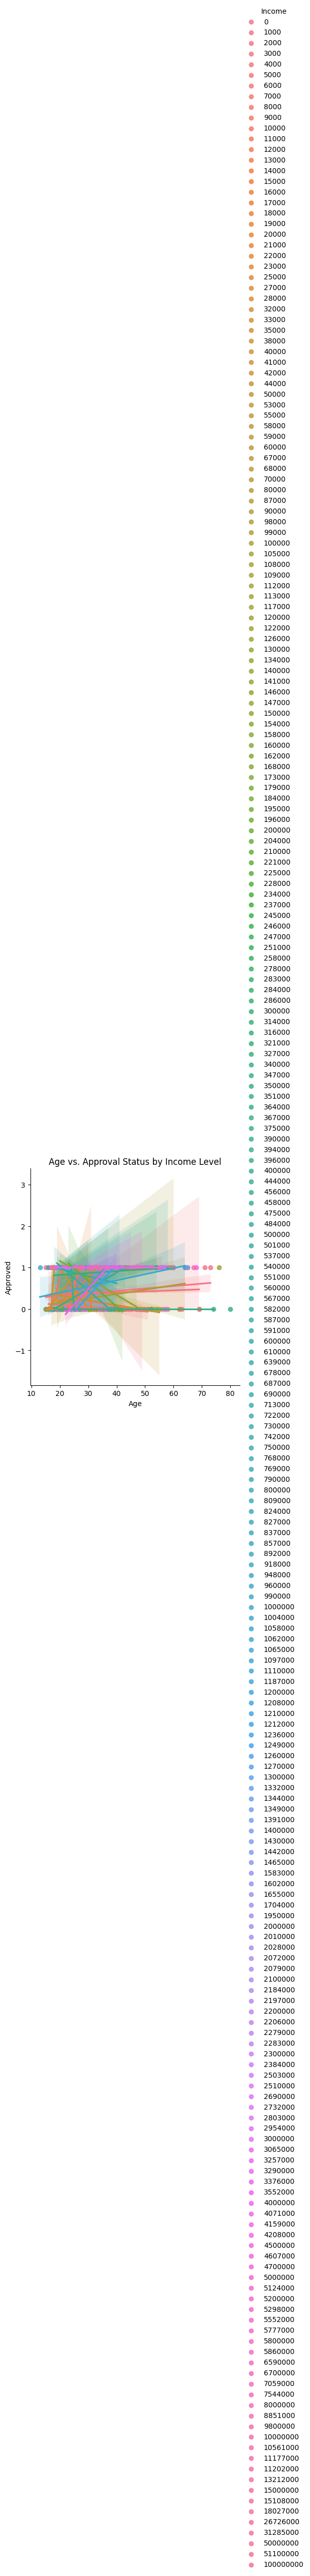

In [64]:
# Interaction term between 'Age' and 'Income'
cleanData['Age_Income'] = cleanData['Age'] * cleanData['Income']

# Visualize
sns.lmplot(x='Age', y='Approved', data=cleanData, hue='Income')
plt.title('Age vs. Approval Status by Income Level')
plt.show()